In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
floatX = np.float64

import sys
sys.path.append("/home/karita/Documents/repos/g902")
%load_ext autoreload
%autoreload g902
import g902
from g902.gmm import GMM
g902.__path__

['/home/karita/Documents/repos/g902/g902']

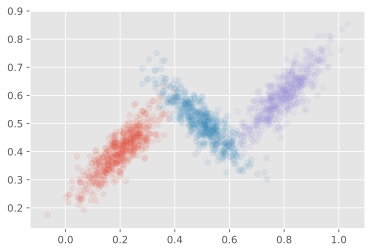

In [2]:
mean_truth = np.array([
    [0.2, 0.4],
    [0.5, 0.5],
    [0.8, 0.6]
])

def rotate(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, -s], [s, c]])

cov_truth = np.array([np.diag([1, 0.3]) / 10 for i in range(3)])
for c, d in zip(cov_truth, [-1, 1, -1]):
    r = rotate(d * np.pi / 4)
    c[:] = r.T.dot(c).dot(r)

dataset = []
for m, c in zip(mean_truth, cov_truth):
    samples = np.random.normal(size=(500, 2))
    samples = samples.dot(c) + m
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.1)
    dataset.append(samples)
dataset = np.concatenate(dataset)

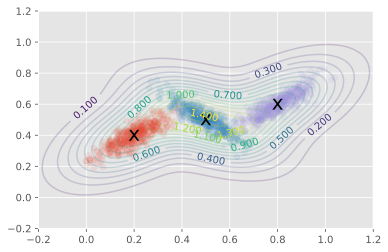

In [3]:
for m, c in zip(mean_truth, cov_truth):
    samples = np.random.normal(size=(500, 2))
    samples = samples.dot(c) + m
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.1)

model = GMM(2, 3)
model.mean[:] = mean_truth
model.cov[:] = cov_truth

x = np.linspace(-0.2, 1.2, 100)
y = np.linspace(-0.2, 1.2, 100)
X, Y = np.meshgrid(x, y)
xs = np.stack([X.ravel(), Y.ravel()]).T

Z = model.likelihood(xs).reshape(X.shape)
cs = plt.contour(X, Y, Z, levels=np.arange(0.0, 1.5, 0.1), alpha=0.2)
plt.clabel(cs, inline=1, fontsize=10)

for mx, my in mean_truth:
    plt.text(mx, my, 'x', va='center', ha='center', fontsize=20)

plt.savefig("/tmp/gmm.png")

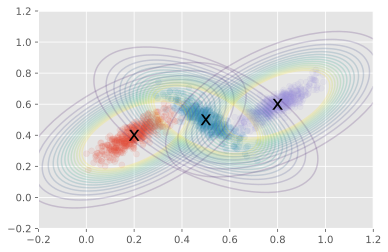

In [4]:
for m, c in zip(mean_truth, cov_truth):
    samples = np.random.normal(size=(500, 2))
    samples = samples.dot(c) + m
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.1)

Zs = model.components(xs).swapaxes(0, 1).reshape(model.n_mix, *X.shape)
for zi in Zs:
    cs = plt.contour(X, Y, zi, levels=np.arange(0.0, 1.5, 0.1), alpha=0.2)
    # plt.clabel(cs, inline=1, fontsize=10)

for mx, my in mean_truth:
    plt.text(mx, my, 'x', va='center', ha='center', fontsize=20)

0 -5614.73207466
10 -85294.903866
20 -89367.5509357
30 -103419.06946
40 -inf
50 -inf
60 -277745.482739
70 -277733.210554


/home/karita/Documents/repos/g902/g902/gmm.py:75: RuntimeWarning: divide by zero encountered in log
  log_likelihood = numpy.log(prob_b_m).sum()
/home/karita/.pyenv/versions/anaconda3-4.4.0/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


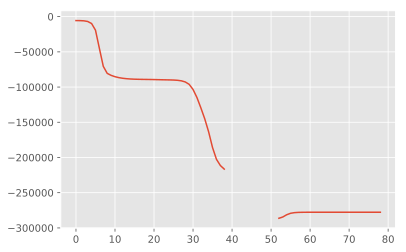

In [5]:
from importlib import reload
reload(g902)
from g902.gmm import GMM
model = GMM(2, 3)
tol = 1e-6
prev_ll = -np.inf
ll_history = []
for i in range(100):
    ll = model.fit(dataset)
    ll_history.append(ll)
    if abs(ll - prev_ll) < tol:
        break
    else:
        prev_ll = ll
    
    if i % 10 == 0:
        print(i, ll)

plt.plot(range(len(ll_history)), ll_history)

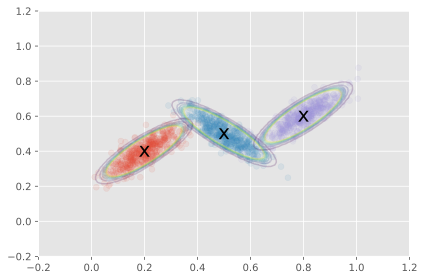

In [6]:
for m, c in zip(mean_truth, cov_truth):
    samples = np.random.normal(size=(500, 2))
    samples = samples.dot(c) + m
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.1)

Zs = model.components(xs).swapaxes(0, 1).reshape(model.n_mix, *X.shape)
for zi in Zs:
    cs = plt.contour(X, Y, zi, levels=np.arange(0.1, 1.5, 0.2), alpha=0.2)

for mx, my in mean_truth:
    plt.text(mx, my, 'x', va='center', ha='center', fontsize=20)
plt.tight_layout()